Import libraries

In [23]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics 

In [9]:
# hardcoded to get header and likelihood header names and index
headertotal = list(pd.read_csv('',header = 0).columns.values) #add file
likelihood_columnindex = [index for index, string in enumerate(headertotal) if 'likelihood' in string]
likelihood_columnnames = [headertotal[x] for x in likelihood_columnindex]
print(likelihood_columnnames)

['nose.2likelihood', 'earL.2likelihood.1', 'earR.2likelihood.2', 'schoulderL.2likelihood.3', 'schoulderR.2likelihood.4', 'tailbase.2likelihood.5']


In [51]:
df_testtrial = pd.read_csv('',header = 0) #add file
list_trial = []
for index, row in df_testtrial.iterrows():
    list_trial.append(row.loc['nose.2likelihood'])           

0.0003750604519154


First, loop through all the downsampled csv files

In [8]:
# for saving amounts
nose_dict = dict()
earl_dict = dict()
earr_dict = dict()
shoulderl_dict = dict()
shoulderr_dict = dict()
tail_dict = dict()

# loop through video paths
for path in list(input_dir.glob("*.csv*")):
    
    #load data
    df_load = pd.read_csv(path,header=0)
    
    # loop through data
    under = np.zeros(6)
    total = len(df_load)
    
    for index, row in df_load.iterrows():
        for i in likelihood_columnnames:
            if row.loc[i] <= 0.50:
                under[likelihood_columnnames.index(i)] += 1  
    
    nose_dict[path.stem] = (under[0]/total)*100
    earl_dict[path.stem] = (under[1]/total)*100
    earr_dict[path.stem] = (under[2]/total)*100
    shoulderl_dict[path.stem] = (under[3]/total)*100
    shoulderr_dict[path.stem] = (under[4]/total)*100
    tail_dict[path.stem] = (under[5]/total)*100

Show all values for the bodyparts over all videos

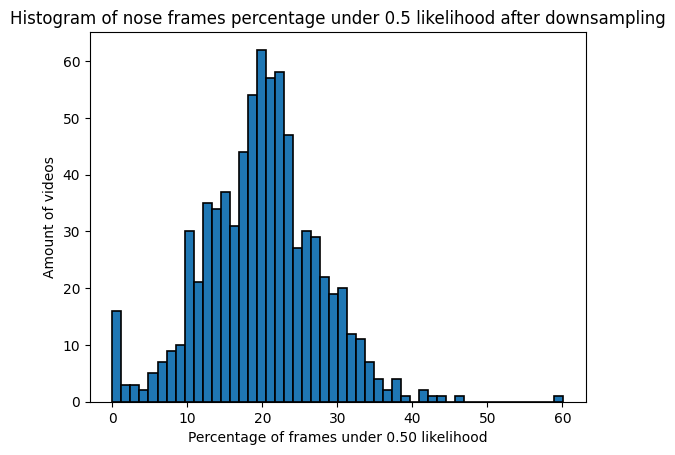

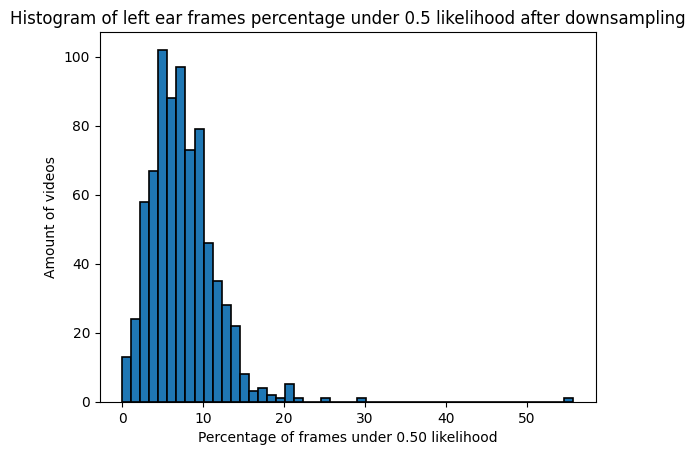

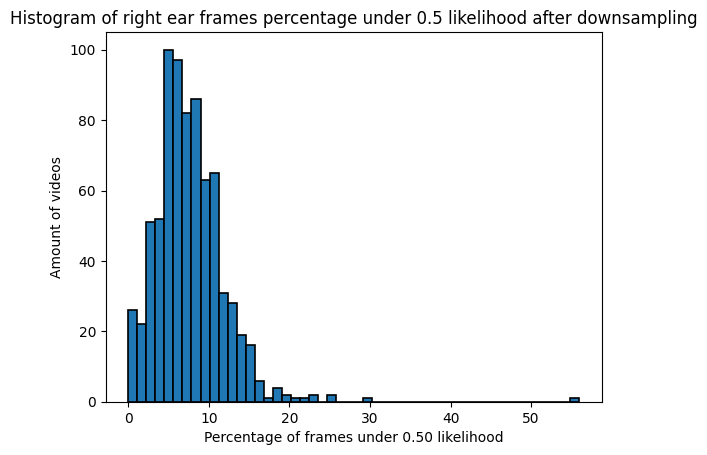

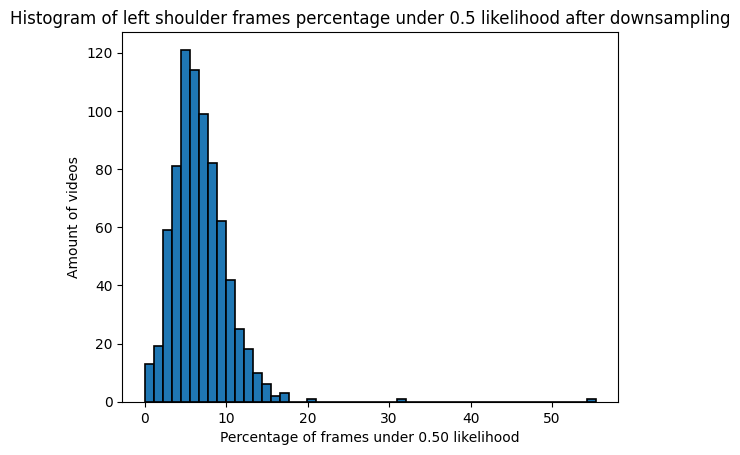

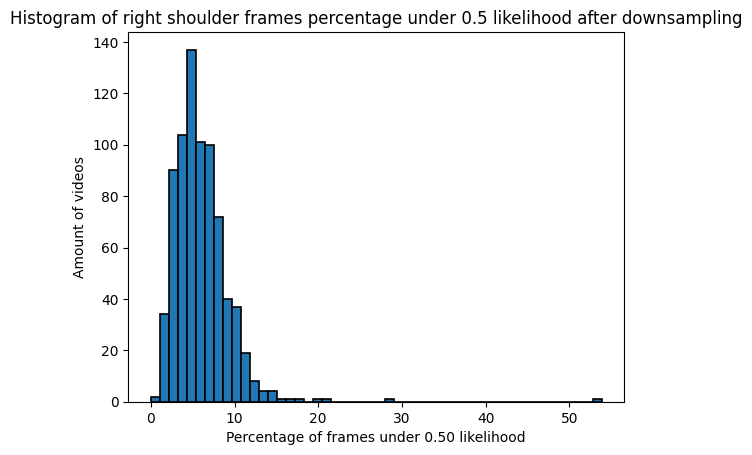

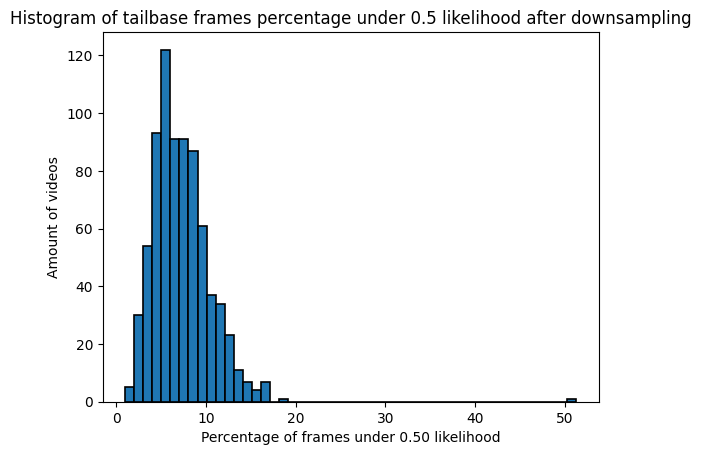

In [46]:
list_nose = list(nose_dict.values())
list_earl = list(earl_dict.values())
list_earr = list(earr_dict.values())
list_shoulderl = list(shoulderl_dict.values())
list_shoulderr = list(shoulderr_dict.values())
list_tail = list(tail_dict.values())

bodyparts_forhist = [list_nose,list_earl,list_earr,list_shoulderl,list_shoulderr,list_tail]
bodyparts = ['nose', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'tailbase']

for i in range(len(bodyparts_forhist)):
    plt.hist(bodyparts_forhist[i], bins=50, edgecolor='black', linewidth=1.2)
    plt.title('Histogram of {} frames percentage under 0.5 likelihood after downsampling'.format(bodyparts[i]))
    plt.xlabel('Percentage of frames under 0.50 likelihood')
    plt.ylabel('Amount of videos')
    plt.savefig('{}percentage_downsampled.png'.format(bodyparts[i])) #change file output
    plt.show()

Get smallest and largest percentage + videoname

In [39]:
print('smallest index nose:')
print(nose_dict[min(nose_dict, key=nose_dict.get)], min(nose_dict, key=nose_dict.get))
print('largest index nose:')
print(nose_dict[max(nose_dict, key=nose_dict.get)], max(nose_dict, key=nose_dict.get))

print('smallest index earl:')
print(earl_dict[min(earl_dict, key=earl_dict.get)], min(earl_dict, key=earl_dict.get))
print('largest index earl:')
print(earl_dict[max(earl_dict, key=earl_dict.get)], max(earl_dict, key=earl_dict.get))

print('smallest index earr:')
print(earr_dict[min(earr_dict, key=earr_dict.get)], min(earr_dict, key=earr_dict.get))
print('largest index earr:')
print(earr_dict[max(earr_dict, key=earr_dict.get)], max(earr_dict, key=earr_dict.get))

print('smallest index shoulderl:')
print(shoulderl_dict[min(shoulderl_dict, key=shoulderl_dict.get)], min(shoulderl_dict, key=shoulderl_dict.get))
print('largest index shoulderl:')
print(shoulderl_dict[max(shoulderl_dict, key=shoulderl_dict.get)], max(shoulderl_dict, key=shoulderl_dict.get))

print('smallest index shoulderr:')
print(shoulderr_dict[min(shoulderr_dict, key=shoulderr_dict.get)], min(shoulderr_dict, key=shoulderr_dict.get))
print('largest index shoulderr:')
print(shoulderr_dict[max(shoulderr_dict, key=shoulderr_dict.get)], max(shoulderr_dict, key=shoulderr_dict.get))

print('smallest index tail:')
print(tail_dict[min(tail_dict, key=tail_dict.get)], min(tail_dict, key=tail_dict.get))
print('largest index tail:')
print(tail_dict[max(tail_dict, key=tail_dict.get)], max(tail_dict, key=tail_dict.get))

smallest index nose:
0.0 SGE8_OLR_SS1_SG208
largest index nose:
60.1270207852194 DYRK_OLR_LTM_T_DR180
smallest index earl:
0.0 CDKL_OLR_Prob_CKL210
largest index earl:
55.750577367205544 DYRK_OLR_LTM_T_DR180
smallest index earr:
0.0 CDKL_OLR_Prob_CKL210
largest index earr:
55.96997690531178 DYRK_OLR_LTM_T_DR180
smallest index shoulderl:
0.0 CDKL_OLR_Prob_CKL210
largest index shoulderl:
55.35796766743649 DYRK_OLR_LTM_T_DR180
smallest index shoulderr:
0.0 CDKL_OLR_Prob_CKL210
largest index shoulderr:
53.8568129330254 DYRK_OLR_LTM_T_DR180
smallest index tail:
1.0309278350515463 CDKL_OLR_Prob_CKL210
largest index tail:
51.29330254041571 DYRK_OLR_LTM_T_DR180


In [45]:
mean_nose = statistics.mean(list(nose_dict.values())) 
mean_earl = statistics.mean(list(earl_dict.values())) 
mean_earr = statistics.mean(list(earr_dict.values())) 
mean_shoulderl = statistics.mean(list(shoulderl_dict.values())) 
mean_shoulderr = statistics.mean(list(shoulderr_dict.values()))  
mean_tail = statistics.mean(list(tail_dict.values())) 
meanlist = [mean_nose,mean_earl,mean_earr,mean_shoulderl,mean_shoulderr,mean_tail]
for i in range(len(meanlist)):
    print(('mean percentage of {} over downsampled videos'.format(bodyparts[i])))
    print(meanlist[i])

mean percentage of nose over downsampled videos
19.861167210502856
mean percentage of left ear over downsampled videos
7.488163582283591
mean percentage of right ear over downsampled videos
7.614561212893541
mean percentage of left shoulder over downsampled videos
6.795409263016532
mean percentage of right shoulder over downsampled videos
6.0423175156178575
mean percentage of tailbase over downsampled videos
7.337083463466538
